In [1]:
import sys, os
# import matplotlib
import scipy.io, numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
mpl.rcParams['font.size'] = 14

In [2]:
cd /data/keeling/a/yicenl2/c/git/project/partmc/scenarios

/data/nriemer/c/yicenl2/git/project/partmc/scenarios


In [7]:
# Read data
gamma_pop = np.zeros((2,2,25))

directory = 'sce_completed/scenarios/scenario_0007'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("ch_1d_orm/urban_plume_process.nc" in filename):
#             sce_ind      =  int(filename[-44:-43])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, 0, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, 0, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600
            
directory = 'sce_completed/scenarios/scenario_0029'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("ch_1d_orm/urban_plume_process.nc" in filename):
#             sce_ind      =  int(filename[-44:-43])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, 1, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, 1, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

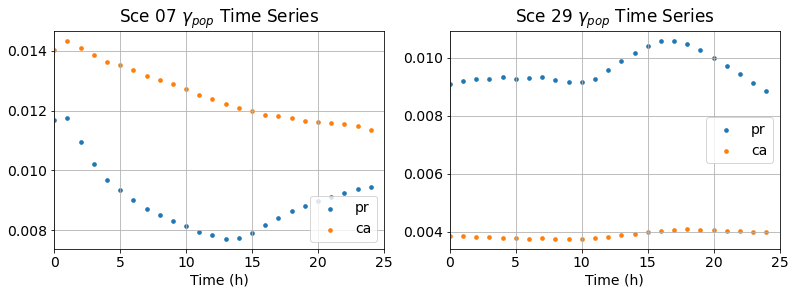

In [8]:
plt.figure(figsize = (13,4))
plt.subplot(1,2,1)
p1 = plt.scatter(time, gamma_pop[0, 0, :].ravel(), label= 'pr', s=10, lw = 1.5)
p2 = plt.scatter(time, gamma_pop[1, 0, :].ravel(), label= 'ca', s=10, lw = 1.5)
plt.title(r'Sce 07 $\gamma_{pop}$ Time Series')
plt.xlim(0,25)
plt.xlabel('Time (h)')
plt.legend(loc=4)
plt.grid()

plt.subplot(1,2,2)
p3 = plt.scatter(time, gamma_pop[0, 1, :].ravel(), label= 'pr', s=10, lw = 1.5)
p4 = plt.scatter(time, gamma_pop[1, 1, :].ravel(), label= 'ca', s=10, lw = 1.5)
plt.title(r'Sce 29 $\gamma_{pop}$ Time Series')
plt.xlim(0,25)
plt.xlabel('Time (h)')
plt.legend()
plt.grid()

In [10]:
# Read data
gas_mixing_ratio = np.zeros((2, 4, 25, 77))
time = np.zeros(25)

directory = '/data/keeling/a/yicenl2/c/git/project/partmc/scenarios/sce_completed/scenarios/scenario_0007'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("1d_oal/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename[-44:-43])
            case = int(filename[-44:-43])
            i = int(filename[-6:-3])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[0,case-1,i-1,:] = ncf.variables["gas_mixing_ratio"].data
            time[i-1] =  ncf.variables["time"].data/3600
            
directory = '/data/keeling/a/yicenl2/c/git/project/partmc/scenarios/sce_completed/scenarios/scenario_0029'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("1d_oal/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename[-44:-43])
            case = int(filename[-44:-43])
            i = int(filename[-6:-3])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[1,case-1,i-1,:] = ncf.variables["gas_mixing_ratio"].data
            time[i-1] =  ncf.variables["time"].data/3600

[ 0.  6. 12. 18. 24.]
[ 0.  6. 12. 18. 24.]


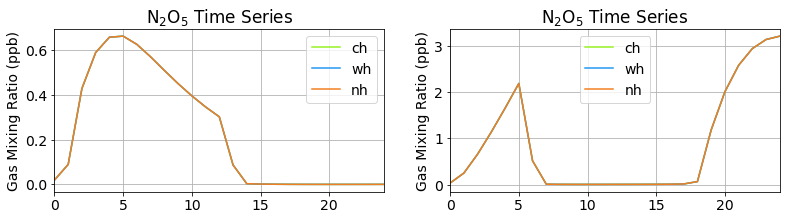

In [11]:
# Make plot
plt.figure(figsize = (13,3))

plt.subplot(1,2,1)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[0,0,:,7], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[0,1,:,7], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[0,3,:,7], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm N_2O_5$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')

plt.subplot(1,2,2)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[1,0,:,7], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[1,1,:,7], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[1,3,:,7], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm N_2O_5$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')


[ 0.  6. 12. 18. 24.]
[ 0.  6. 12. 18. 24.]


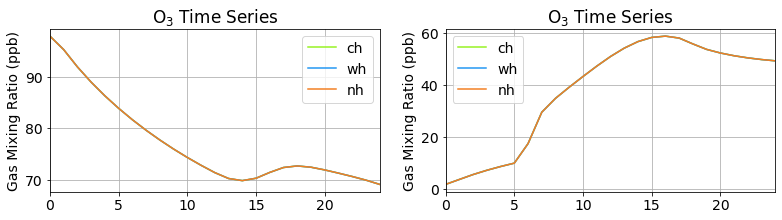

In [12]:
# Make plot
plt.figure(figsize = (13,3))

plt.subplot(1,2,1)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[0,0,:,10], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[0,1,:,10], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[0,3,:,10], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm O_3$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')

plt.subplot(1,2,2)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[1,0,:,10], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[1,1,:,10], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[1,3,:,10], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm O_3$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')


[ 0.  6. 12. 18. 24.]
[ 0.  6. 12. 18. 24.]


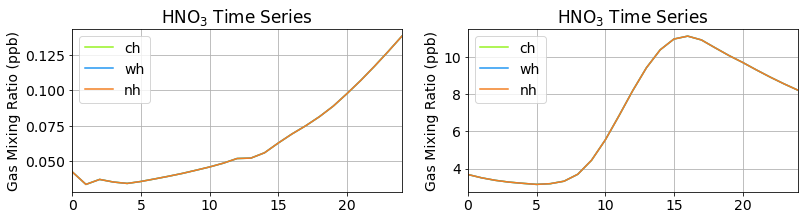

In [13]:
# Make plot
plt.figure(figsize = (13,3))

plt.subplot(1,2,1)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[0,0,:,1], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[0,1,:,1], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[0,3,:,1], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm HNO_3$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')

plt.subplot(1,2,2)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[1,0,:,1], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[1,1,:,1], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[1,3,:,1], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm HNO_3$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')


[ 0.  6. 12. 18. 24.]
[ 0.  6. 12. 18. 24.]


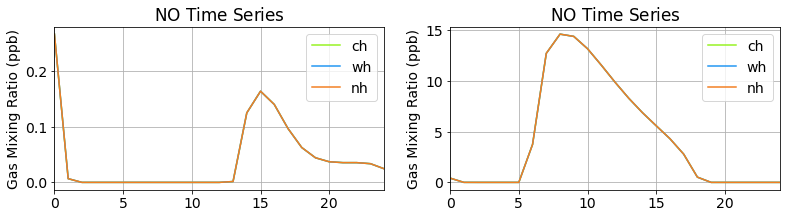

In [14]:
# Make plot
plt.figure(figsize = (13,3))

plt.subplot(1,2,1)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[0,0,:,4], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[0,1,:,4], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[0,3,:,4], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm NO$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')

plt.subplot(1,2,2)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[1,0,:,4], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[1,1,:,4], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[1,3,:,4], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm NO$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')


[ 0.  6. 12. 18. 24.]
[ 0.  6. 12. 18. 24.]


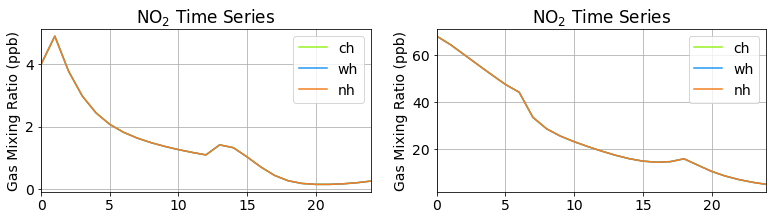

In [15]:
# Make plot
plt.figure(figsize = (13,3))

plt.subplot(1,2,1)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[0,0,:,5], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[0,1,:,5], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[0,3,:,5], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm NO_2$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')

plt.subplot(1,2,2)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, gas_mixing_ratio[1,0,:,5], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, gas_mixing_ratio[1,1,:,5], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, gas_mixing_ratio[1,3,:,5], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm NO_2$ Time Series')
plt.xlim(0,24)
#plt.xlabel('Time (h)')
#plt.xticks(x,values)
plt.ylabel('Gas Mixing Ratio (ppb)')
plt.legend()
plt.grid()
# plt.savefig('/data/keeling/a/yicenl2/d/images/h2_hgamma/h2.png')


In [16]:
#Read data
bulk_conc = np.zeros((2,5,4,25))
# time = np.zeros(121)

directory = '/data/keeling/a/yicenl2/c/git/project/partmc/scenarios/sce_completed/scenarios/scenario_0007'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("1d_oal/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename[-38:-37])
            case = int(filename[-38:-37])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
#             print(time)
            bulk_conc[0,0,case-1,:] = ncf.variables["tot_no3_mass_conc"].data*1e9
            bulk_conc[0,1,case-1,:] = ncf.variables["tot_bc_mass_conc"].data*1e9
            bulk_conc[0,2,case-1,:] = ncf.variables["tot_oc_mass_conc"].data*1e9
            bulk_conc[0,3,case-1,:] = ncf.variables["tot_na_mass_conc"].data*1e9
            bulk_conc[0,4,case-1,:] = ncf.variables["tot_cl_mass_conc"].data*1e9
            
directory = '/data/keeling/a/yicenl2/c/git/project/partmc/scenarios/sce_completed/scenarios/scenario_0029'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("1d_oal/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename[-38:-37])
            case = int(filename[-38:-37])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
#             print(time)
            bulk_conc[1,0,case-1,:] = ncf.variables["tot_no3_mass_conc"].data*1e9
            bulk_conc[1,1,case-1,:] = ncf.variables["tot_bc_mass_conc"].data*1e9
            bulk_conc[1,2,case-1,:] = ncf.variables["tot_oc_mass_conc"].data*1e9
            bulk_conc[1,3,case-1,:] = ncf.variables["tot_na_mass_conc"].data*1e9
            bulk_conc[1,4,case-1,:] = ncf.variables["tot_cl_mass_conc"].data*1e9

# time = np.linspace(0,120,121)
# print(time)

[ 0.  6. 12. 18. 24.]
[ 0.  6. 12. 18. 24.]


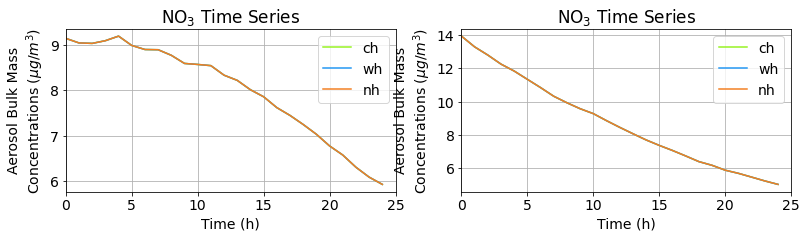

In [17]:
#Make plot
plt.figure(figsize = (13,3))

plt.subplot(1,2,1)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, bulk_conc[0,0,0,:], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, bulk_conc[0,0,1,:], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, bulk_conc[0,0,3,:], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm NO_3$ Time Series')
plt.xlim(0,25)
plt.xlabel('Time (h)')
# plt.xticks(x,values)
plt.ylabel('Aerosol Bulk Mass'
           '\n'
           'Concentrations ($µg/m^3$)')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
x = np.linspace(0,24,5)
print(x)
# values = ['6pm','12am','6am','12pm','6pm']
s = pd.Series(['ch','wh','mh','nh'])
color = pd.Series(['#96f321','#2196f3','#e721f3','#f37e21'])
p_ch = plt.plot(time, bulk_conc[1,0,0,:], label= s[0], lw = 1.5, color = color[0])
p_wh = plt.plot(time, bulk_conc[1,0,1,:], label= s[1], lw = 1.5, color = color[1])
p_nh = plt.plot(time, bulk_conc[1,0,3,:], label= s[3], lw = 1.5, color = color[3])
plt.title(r'$\rm NO_3$ Time Series')
plt.xlim(0,25)
plt.xlabel('Time (h)')
# plt.xticks(x,values)
plt.ylabel('Aerosol Bulk Mass'
           '\n'
           'Concentrations ($µg/m^3$)')
plt.legend()
plt.grid()